# Adding Polynomial Features

To date, we have done linear regression in order to calculate ideal weights for each of our features. We glimpsed a preview of expanding upon this by creating new features by raising current features to succesive powers. This forms the basis of the more generalized polynomial regression in which we investigate linear combinations of both features and features to various powers. SciKitLearn also has a built in method for doing this on a larger scale which we'll take a look at here.

Theoretical example: 
http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py

### Here's a fun example of trying to fit polynomial curves to the function  $y = x \bullet sin(x)$

##### Generating Sample Data

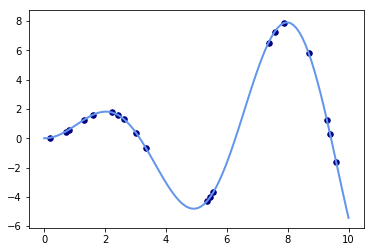

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

In [5]:
X

array([[ 0.2020202 ],
       [ 0.70707071],
       [ 0.80808081],
       [ 1.31313131],
       [ 1.61616162],
       [ 2.22222222],
       [ 2.42424242],
       [ 2.62626263],
       [ 3.03030303],
       [ 3.33333333],
       [ 5.35353535],
       [ 5.45454545],
       [ 5.55555556],
       [ 7.37373737],
       [ 7.57575758],
       [ 7.87878788],
       [ 8.68686869],
       [ 9.29292929],
       [ 9.39393939],
       [ 9.5959596 ]])

In [6]:
x

array([ 0.2020202 ,  0.70707071,  0.80808081,  1.31313131,  1.61616162,
        2.22222222,  2.42424242,  2.62626263,  3.03030303,  3.33333333,
        5.35353535,  5.45454545,  5.55555556,  7.37373737,  7.57575758,
        7.87878788,  8.68686869,  9.29292929,  9.39393939,  9.5959596 ])

### Modelling with Successive Polynomials

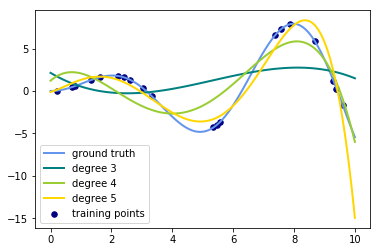

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x.reshape(-1,1)
X_plot = x_plot.reshape(-1, 1)
# [:, np.newaxis]
# X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree {}".format(degree))

plt.legend(loc='lower left')

plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Housing_Prices/train.csv')
print(len(df))
df.head()

1460


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Practice

Practice using the same process above to fit a polynomial model using Lasso regression and polynomial features.

* Create a plot of train and test errors by maximum degree of the polynomial model
* Determine an optimal model complexity from this
* Output a final model with predictions

In [ ]:
# Your code here